### Imports

In [4]:
import cv2
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from skimage import io
import pickle
from PIL import Image, ImageFilter
from skimage.util import invert

In [2]:
input_dir   = './../../../docbank_processed/processed_data/cage_results7/'
ori_txt_dir = './../../../docbank_processed/processed_data/txt/'
output_txt  = './../../../docbank_processed/processed_data/out_txt_7/'
output_dir  = './../../../docbank_processed/processed_data/predictions_7/'

In [3]:
image_dir = './../../../docbank_processed/processed_data/spear_ori_black/'

In [40]:
img = cv2.imread(input_dir)
print(img.shape)

(841, 595, 3)


In [41]:
final_img = io.imread('./../../../docbank_processed/processed_data/spear_ori_black/103.tar_1408.2982.gz_banach_4_ori_pro.jpg')
print(final_img.shape)

(841, 595, 3)


In [8]:
img = cv2.imread('./../../../docbank_processed/processed_data/cage_results7/132.tar_1410.2655.gz_CRBTSM_parizot_final_7_ori_pro.jpg')
img = invert(img)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Convert the grayscale image to binary
ret, binary = cv2.threshold(gray, 100, 255, cv2.THRESH_OTSU)

# To detect object contours, we want a black background and a white 
# foreground, so we invert the image (i.e. 255 - pixel value)
inverted_binary = ~binary

# Find the contours on the inverted binary image, and store them in a list
# Contours are drawn around white blobs.
# hierarchy variable contains info on the relationship between the contours
contours, hierarchy = cv2.findContours(inverted_binary,
cv2.RETR_TREE,
cv2.CHAIN_APPROX_SIMPLE)

#This is inmtermediate contour image having red contours plotted along the letters
with_contours_int = cv2.drawContours(img, contours, -1,(0,0,255),2)

#We again perform binarization of above image inorder to find contours again 
gray_contour = cv2.cvtColor(with_contours_int, cv2.COLOR_BGR2GRAY)

ret, binary_contour = cv2.threshold(gray_contour, 100, 255, 
cv2.THRESH_OTSU)
inverted_contour = ~binary_contour

# We find contours again of this inverted binary map so that word boundaries are detected
contours, hierarchy = cv2.findContours(inverted_contour,
cv2.RETR_TREE,
cv2.CHAIN_APPROX_SIMPLE)

bboxes = []
# Draw a bounding box around all contours
for c in contours:
    x, y, w, h = cv2.boundingRect(c)
    # Make sure contour area is large enough
    if (cv2.contourArea(c)) > 10 and h < 30:
        #cv2.rectangle(origimage,(x,y), (x+w,y+h), (0,0,0), cv2.FILLED)
        bboxes.append(['text',1,x, y, w, h])

# final_img = np.zeros((img.shape), dtype = np.uint8)
final_img = io.imread('./../../../docbank_processed/processed_data/spear_ori_black/132.tar_1410.2655.gz_CRBTSM_parizot_final_7_ori_pro.jpg')
for b in bboxes:
    x = b[2]
    y = b[3]
    w = int(b[4]*2)
    h = int(b[5]*(2.5))
    cv2.rectangle(final_img,(x,y), (x+w,y+h), (0, 255,0),1)

# final_img_last = ~final_img
io.imsave("temp.jpg",final_img)

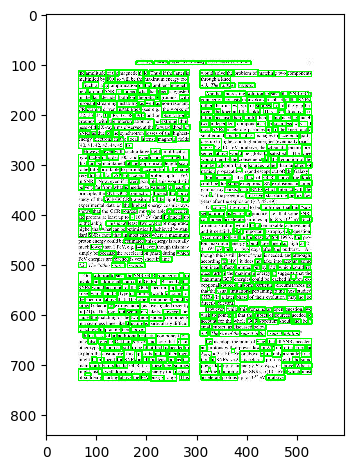

In [32]:
io.imshow(final_img)

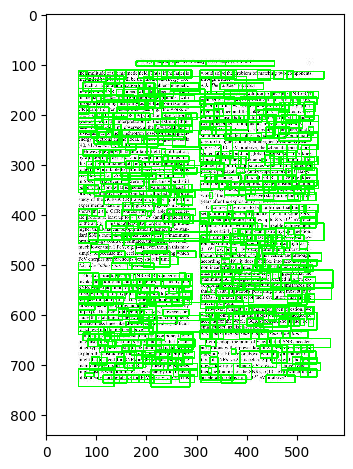

In [30]:
io.imshow(final_img)

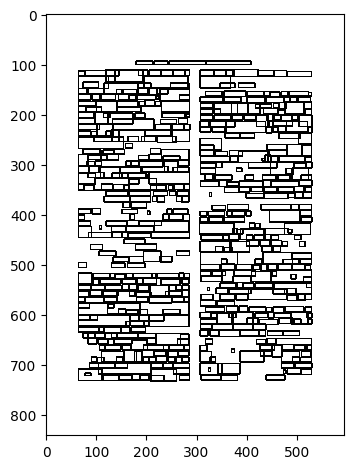

In [13]:
io.imshow(final_img_last)

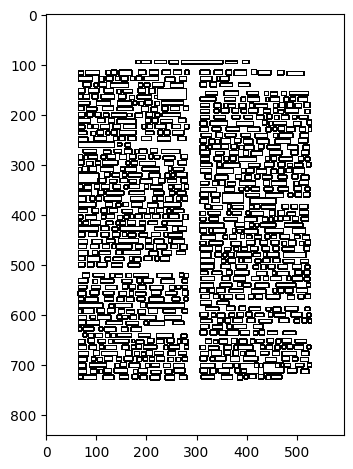

In [10]:
io.imshow(final_img)

In [6]:
dir_list = os.listdir(ori_txt_dir)
results = {}
images = []

for file in dir_list:
    name = file[:len(file) - 4]
    df = pd.read_csv(ori_txt_dir+file, delimiter='\t')
    if(df.shape[0]>0):
        if(os.i)
        img = cv2.imread(input_dir+name+'_ori_pro.jpg')
        img = invert(img)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
        #gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        # Convert the grayscale image to binary
        ret, binary = cv2.threshold(gray, 100, 255, cv2.THRESH_OTSU)

        # To detect object contours, we want a black background and a white 
        # foreground, so we invert the image (i.e. 255 - pixel value)
        inverted_binary = ~binary

        # Find the contours on the inverted binary image, and store them in a list
        # Contours are drawn around white blobs.
        # hierarchy variable contains info on the relationship between the contours
        contours, hierarchy = cv2.findContours(inverted_binary,
        cv2.RETR_TREE,
        cv2.CHAIN_APPROX_SIMPLE)

        #This is inmtermediate contour image having red contours plotted along the letters
        with_contours_int = cv2.drawContours(img, contours, -1,(0,0,255),2)

        #We again perform binarization of above image inorder to find contours again 
        gray_contour = cv2.cvtColor(with_contours_int, cv2.COLOR_BGR2GRAY)

        ret, binary_contour = cv2.threshold(gray_contour, 100, 255, 
        cv2.THRESH_OTSU)
        inverted_contour = ~binary_contour

        # We find contours again of this inverted binary map so that word boundaries are detected
        contours, hierarchy = cv2.findContours(inverted_contour,
        cv2.RETR_TREE,
        cv2.CHAIN_APPROX_SIMPLE)

        bboxes = []
        # Draw a bounding box around all contours
        for c in contours:
            x, y, w, h = cv2.boundingRect(c)
            # Make sure contour area is large enough
            if (cv2.contourArea(c)) > 10 and h < 30:
                #cv2.rectangle(origimage,(x,y), (x+w,y+h), (0,0,0), cv2.FILLED)
                bboxes.append(['text',1,x, y, w, h])

        #final_img = np.zeros((img.shape), dtype = np.uint8)
        final_img = 
        for b in bboxes:
            x = b[2]
            y = b[3]
            w = b[4] * 2
            h = b[5] * 4
            cv2.rectangle(final_img,(x,y), (x+w,y+h), (255, 255, 255),2)

        final_img = ~final_img
#         final_img = binarize_image(final_img)
#         final_img = final_img*1


        io.imsave(output_dir+name+'_pred.jpg', final_img)
        df = pd.DataFrame(bboxes, columns = ['label', 'confidence', 'x0', 'y0', 'w', 'h'])
        df.to_csv(output_txt + name + '.txt', sep=' ',index=False)
    else:
        os.remove(ori_txt_dir+file)

/tmp/ipykernel_3580592/1809005227.py:66: UserWarning: ./../../../docbank_processed/processed_data/predictions/148.tar_1707.02008.gz_ms_9_pred.jpg is a low contrast image
  io.imsave(output_dir+name+'_pred.jpg', final_img)
/tmp/ipykernel_3580592/1809005227.py:66: UserWarning: ./../../../docbank_processed/processed_data/predictions/100.tar_1705.04261.gz_main_11_pred.jpg is a low contrast image
  io.imsave(output_dir+name+'_pred.jpg', final_img)


In [43]:
dir_list = os.listdir(ori_txt_dir)
results = {}
images = []

for file in dir_list:
    name = file[:len(file) - 4]
    df = pd.read_csv(ori_txt_dir+file, delimiter='\t')
    if(df.shape[0]>0):
        img = cv2.imread(input_dir+name+'_ori_pro.jpg')
        img = invert(img)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


        gray_inverted = cv2.bitwise_not(gray)
        ret,thresh = cv2.threshold(gray_inverted,100,255,0)
        contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        ret,thresh = cv2.threshold(gray,1,255,3)
        contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        
        
        results = []
        img = 0*img
        img = invert(img)
        for i in range(len(contours)):
            values = []
            x,y,w,h = cv2.boundingRect(contours[i])
            if(w*h>=20):
                values.append("equation")
                values.append(1)
                values.append(x)
                values.append(y)
                values.append(w)
                values.append(h)
                cv2.drawContours(img, contours, i, (0,255,0),1)
                results.append(values)
        io.imsave(output_dir+name+'_pred.jpg', img)
        df = pd.DataFrame(results, columns = ['label', 'confidence', 'x0', 'y0', 'w', 'h'])
        df.to_csv(output_txt + name + '.txt', sep=' ',index=False)
    else:
        os.remove(ori_txt_dir+file)

/tmp/ipykernel_1560700/3249758376.py:37: UserWarning: ./../../../docbank_processed/only_eqn/predictions/12.tar_1701.05337.gz_ms_14_pred.jpg is a low contrast image
  io.imsave(output_dir+name+'_pred.jpg', img)
/tmp/ipykernel_1560700/3249758376.py:37: UserWarning: ./../../../docbank_processed/only_eqn/predictions/63.tar_1504.07006.gz_mayak_arxiv_20141204_7_pred.jpg is a low contrast image
  io.imsave(output_dir+name+'_pred.jpg', img)
/tmp/ipykernel_1560700/3249758376.py:37: UserWarning: ./../../../docbank_processed/only_eqn/predictions/102.tar_1705.05217.gz_final_report_3_pred.jpg is a low contrast image
  io.imsave(output_dir+name+'_pred.jpg', img)
/tmp/ipykernel_1560700/3249758376.py:37: UserWarning: ./../../../docbank_processed/only_eqn/predictions/16.tar_1801.06571.gz_CS_susceptibility_final_6_pred.jpg is a low contrast image
  io.imsave(output_dir+name+'_pred.jpg', img)
/tmp/ipykernel_1560700/3249758376.py:37: UserWarning: ./../../../docbank_processed/only_eqn/predictions/190.tar_1

In [ ]:
d

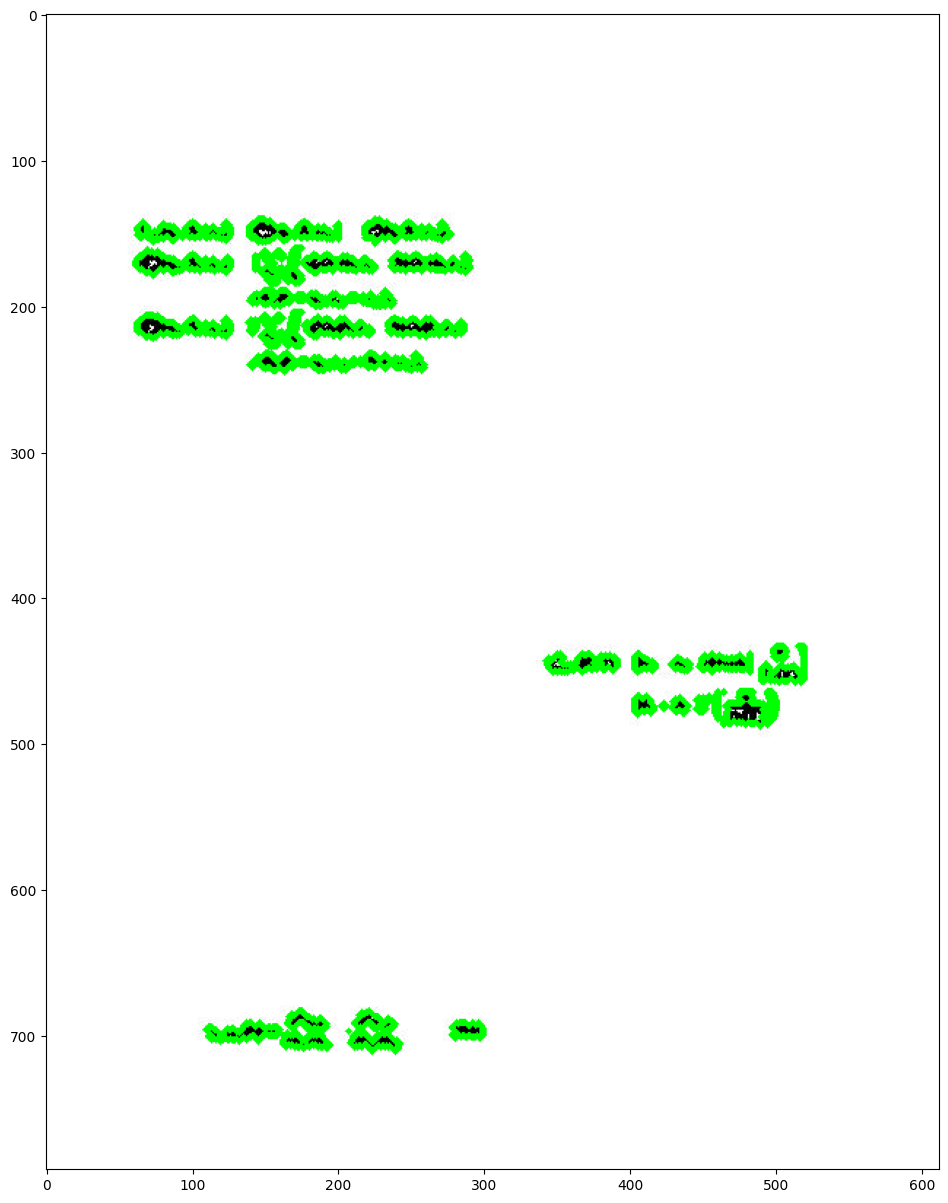

In [44]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('./../../../docbank_processed/only_eqn/cage_results5/113.tar_1507.06116.gz_fluct_150720_7_ori_pro.jpg')
img2 = img.copy()
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_inverted = cv2.bitwise_not(gray)

ret,thresh = cv2.threshold(gray_inverted,100,255,0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

cv2.drawContours(img2, contours, -1, (0,255,0), 3)

plt.figure(figsize = (15,15))
plt.imshow(img2)
plt.show()

In [9]:
from PIL import Image

In [10]:
img1 = Image.open("./../../../docbank_processed/processed_data/cage_results7/10.tar_1701.04170.gz_TPNL_afterglow_evo_8_ori_pro.jpg")

In [11]:
img2 = Image.open("./../../../docbank_processed/processed_data/predictions_7/10.tar_1701.04170.gz_TPNL_afterglow_evo_8_pred.jpg")

In [13]:
x = img1.paste(img2,(0,0))

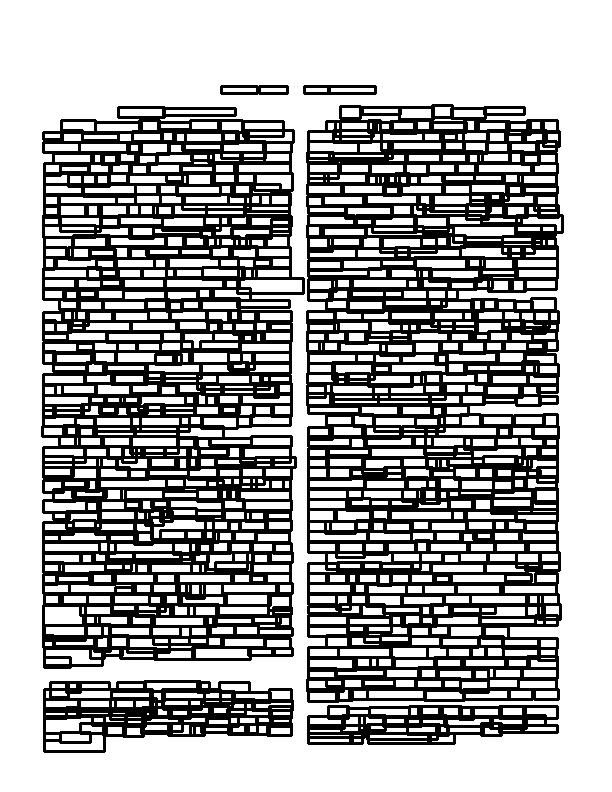

In [16]:
img1